In [15]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
import datetime, random


{'csiBuff': array([[-225.+197.j,  -97.+173.j,    8.+104.j, ...,   -2.  -2.j,
           1.  +3.j,    0.  +0.j],
       [ 161.-233.j,   48.-186.j,  -46. -88.j, ...,    0.  +0.j,
          -1.  +2.j,   -3.  +6.j],
       [-258. +36.j, -146. +89.j,  -24. +94.j, ...,    0.  +0.j,
          -4.  +2.j,   -3.  +0.j],
       ...,
       [ 135.+228.j,  107.+155.j,   52.+112.j, ...,   -1.  +1.j,
           2.  -2.j,    0.  +2.j],
       [ 338.-150.j,  229.-137.j,  151. -63.j, ...,   -4.  +4.j,
           3.  +1.j,    0.  +4.j],
       [-118.-244.j, -103.-165.j,  -49.-113.j, ...,    0.  +0.j,
           0.  +1.j,   -1.  -1.j]]), 'delayBuff': array([[9258138.85379088, 9258138.84649909, 9258138.82723502, ...,
        9258112.12806422, 9258112.10313406, 9258112.07802993]]), 'rawCSIBuff': array([[12.+2.j, -2.-2.j,  3.-6.j, ..., -1.+0.j, -1.-1.j,  1.+1.j],
       [ 2.+7.j,  6.-1.j, -1.-1.j, ..., -1.+0.j,  1.-3.j,  2.+2.j],
       [ 6.+6.j,  2.-2.j,  1.-1.j, ..., -2.+1.j,  1.-1.j, -1.+4.j],
       ...,

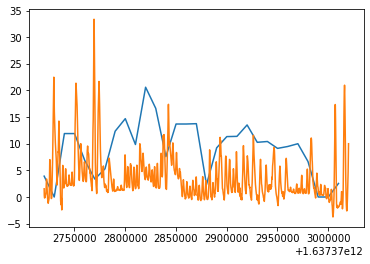

In [3]:
#breath_matrix= loadmat('data/10_22_5min_100ms.mat')
csi_matrix= loadmat('data/data_br_gt.mat')
breath_matrix= loadmat('vernier/vernier belt/ground_truth_11_19_2021_5min_100ms.mat')

del breath_matrix["__header__"]
del breath_matrix["__version__"]
del breath_matrix["__globals__"]
breath_matrix["force"] = breath_matrix["force"][0]
breath_matrix["RR_bpm"] = breath_matrix["RR_bpm"][0]
breath_matrix["curr_time"] = breath_matrix["curr_time"][0]
breath_matrix["curr_time"] = breath_matrix["curr_time"]*1000

del csi_matrix["__header__"]
del csi_matrix["__version__"]
del csi_matrix["__globals__"]
##Look at force/respiration rate over time
print(csi_matrix)
rr = breath_matrix["RR_bpm"]
time = breath_matrix["curr_time"]
force = breath_matrix['force']
rr_good = rr[~np.isnan(rr)]
time_good = time[~np.isnan(rr)]
plt.plot(time_good, rr_good)
plt.plot(time,force)
plt.show()

In [3]:
##max is 255
mat = csi_matrix["None"]
work = csi_matrix['__function_workspace__'][0]
print(mat[0][3][3])
print(max(work))

[1]
255


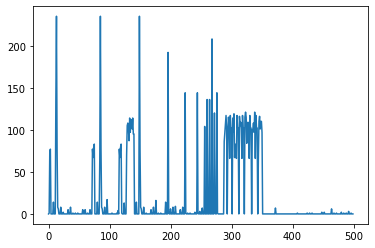

In [4]:
plt.plot(work[:500])

In [68]:
##split csi into two packers
csi = pd.DataFrame(csi_matrix["csiBuff"])
csi_1 = csi.iloc[::2]
csi_1 = csi_1[:-1] ##its even
csi_2 = csi.iloc[1::2]
time = pd.DataFrame(csi_matrix["sysTimeBuff"])
time = time.transpose()
time_1 = time[::2]
time_1 = time_1[:-1]
time_2 = time[1::2]
csi_1["time"] = time_1[0].values
csi_2["time"] = time_2[0].values
csi_1 = csi_1.set_index("time")
csi_2 = csi_2.set_index("time")
amp_1 = csi_1.abs()
amp_2 = csi_2.abs()

KeyError: 'csiBuff'

In [ ]:



fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
xs = amp_1.index.values
for col in range(52):
    ys = amp_1[col]
    z = col
    ax.bar(xs, ys, zs=z, zdir='y', alpha=0.8,width=8)
#plt.show()


In [15]:
#import math
#times=(np.array(amp_1.index)).astype(int)

In [47]:
ts_epoch = times[0]
print(str(ts_epoch))
print(breath_matrix["curr_time"][0])

1637204048943
1637204044765484.2


ValueError: year 53850 is out of range

In [281]:
np.round(56294995342131.5, 0)

56294995342132.0

In [2]:
csi_matrix= loadmat('data/csi_signal.mat')
breath_matrix= loadmat('data/br_estimates.mat')


/usr/lib/python3/dist-packages/scipy/io/matlab/mio.py:218: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [3]:
csi_matrix

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Sun Dec  5 22:50:15 2021',
 '__version__': '1.0',
 '__globals__': [],
 'None': MatlabOpaque([(b'stream3', b'MCOS', b'Stream', array([[3707764736],
        [         2],
        [         1],
        [         1],
        [         7],
        [         2]], dtype=uint32))],
              dtype=[('s0', 'O'), ('s1', 'O'), ('s2', 'O'), ('arr', 'O')]),
 '__function_workspace__': array([[ 0,  1, 73, ...,  0,  0,  0]], dtype=uint8)}

In [5]:
breath_matrix

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Sun Dec  5 22:51:01 2021',
 '__version__': '1.0',
 '__globals__': [],
 'breathing_rates': array([[0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 0],
        [1, 1, 0, ..., 0, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 0, 0],
        [1, 1, 1, ..., 0, 1, 0],
        [1, 1, 1, ..., 1, 1, 0]], dtype=uint8)}

In [16]:
d1 = pd.read_csv("data/data_1/csi1.csv")
d1 = d1.rename(columns = {"Column214":"ImgCoef","Column213":"core", "Column212":"stream", "Column209":"timeBuff", "Column210":"sysTimeBuff", "Column211":"delayBuff"})

In [54]:
###first 208 are subcarriers, then three are timebuff, systimebuff, delaybuff, then the stream number and the core number
#Seperate out streams and cores
s1 = d1[d1.stream == 1]
s2 = d1[d1.stream == 2]
s3 = d1[d1.stream == 3]
s1_c1 = s1[s1.core == 1]
s1_c2 = s1[s1.core == 2]
s2_c1 = s2[s2.core == 1]
s2_c2 = s2[s2.core == 2]
s3_c1 = s3[s3.core == 1]
s3_c2 = s3[s3.core == 2]
s1_c1 = s1_c1.reset_index(drop = True)
s1_c2 = s1_c2.reset_index(drop = True) 
s2_c1 = s2_c1.reset_index(drop = True)
s2_c2 = s2_c2.reset_index(drop = True)
s3_c1 = s3_c1.reset_index(drop = True)
s3_c2 = s3_c2.reset_index(drop = True)

streams = [s1_c1,s1_c2,s2_c1, s2_c2, s3_c1, s3_c2]
comp_streams = []
for stream in streams:
    real = stream[stream.ImgCoef == 0]
    img  = stream[stream.ImgCoef == 1]
    
    for col in real.columns[:-6]:
        real[col] = [complex(r,i) for r,i in zip(real[col], img[col])]
    comp_streams.append(real)
        
    
    
    

<ipython-input-54-bbf9156fa484>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real[col] = [complex(r,i) for r,i in zip(real[col], img[col])]


In [59]:
spatial1 = comp_streams[:2]
spatial2 = comp_streams[2:4]
spatial3 = comp_streams[4:6]



In [64]:
spatial3[0].

1636400000000.0

In [47]:
one = [1,2,3]
one = one*j

NameError: name 'j' is not defined

In [45]:
type(comp)

complex